In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.datasets import imdb
from sklearn.model_selection import train_test_split

In [3]:
(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=500)

In [4]:
train_input, val_input, train_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2, random_state=42)

In [5]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq = pad_sequences(train_input, maxlen = 100)
val_seq = pad_sequences(val_input, maxlen=100)

In [6]:
model = keras.Sequential()
model.add(keras.layers.Embedding(500, 16, input_length=100))
model.add(keras.layers.LSTM(8))
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           8000      
                                                                 
 lstm (LSTM)                 (None, 8)                 800       
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 8809 (34.41 KB)
Trainable params: 8809 (34.41 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [8]:
rmsprop = keras.optimizers.RMSprop(learning_rate=0.0001)
model.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-lstm-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model.fit(train_seq, train_target, epochs=100, batch_size=64,
                    validation_data=(val_seq, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100


313/313 [==============================] - 9s 22ms/step - loss: 0.6920 - accuracy: 0.5350 - val_loss: 0.6911 - val_accuracy: 0.5626
Epoch 2/100
  7/313 [..............................] - ETA: 6s - loss: 0.6909 - accuracy: 0.5781

C:\Users\kimtp\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 6s 21ms/step - loss: 0.6881 - accuracy: 0.6234 - val_loss: 0.6858 - val_accuracy: 0.6172
Epoch 3/100
313/313 [==============================] - 7s 21ms/step - loss: 0.6773 - accuracy: 0.6596 - val_loss: 0.6671 - val_accuracy: 0.6626
Epoch 4/100
313/313 [==============================] - 7s 21ms/step - loss: 0.6244 - accuracy: 0.7043 - val_loss: 0.5895 - val_accuracy: 0.7222
Epoch 5/100
313/313 [==============================] - 7s 21ms/step - loss: 0.5710 - accuracy: 0.7369 - val_loss: 0.5601 - val_accuracy: 0.7384
Epoch 6/100
313/313 [==============================] - 6s 20ms/step - loss: 0.5458 - accuracy: 0.7501 - val_loss: 0.5398 - val_accuracy: 0.7496
Epoch 7/100
313/313 [==============================] - 6s 21ms/step - loss: 0.5253 - accuracy: 0.7616 - val_loss: 0.5218 - val_accuracy: 0.7602
Epoch 8/100
313/313 [==============================] - 7s 21ms/step - loss: 0.5066 - accuracy: 0.7728 - val_loss: 0.5060 - val_accuracy: 0.7734
Epoc

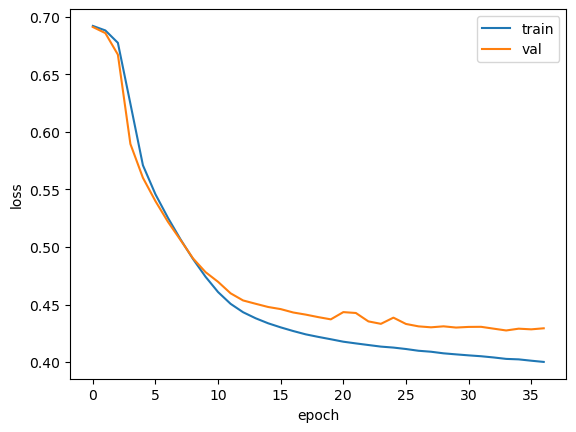

In [9]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [10]:
model = keras.Sequential()
model.add(keras.layers.Embedding(500, 16, input_length=100))
model.add(keras.layers.LSTM(8, dropout=0.3, return_sequences=True))
model.add(keras.layers.LSTM(8, dropout=0.3))
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 16)           8000      
                                                                 
 lstm_1 (LSTM)               (None, 100, 8)            800       
                                                                 
 lstm_2 (LSTM)               (None, 8)                 544       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 9353 (36.54 KB)
Trainable params: 9353 (36.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
rmsprop = keras.optimizers.RMSprop(learning_rate=0.0001)
model.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-2lstm-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model.fit(train_seq, train_target, epochs=100, batch_size=64,
                    validation_data=(val_seq, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 16s 44ms/step - loss: 0.6928 - accuracy: 0.5329 - val_loss: 0.6924 - val_accuracy: 0.5800
Epoch 2/100
313/313 [==============================] - 13s 41ms/step - loss: 0.6915 - accuracy: 0.5779 - val_loss: 0.6901 - val_accuracy: 0.6230
Epoch 3/100
313/313 [==============================] - 13s 41ms/step - loss: 0.6848 - accuracy: 0.6231 - val_loss: 0.6740 - val_accuracy: 0.6626
Epoch 4/100
313/313 [==============================] - 13s 41ms/step - loss: 0.6360 - accuracy: 0.6798 - val_loss: 0.5994 - val_accuracy: 0.6954
Epoch 5/100
313/313 [==============================] - 13s 41ms/step - loss: 0.5838 - accuracy: 0.7081 - val_loss: 0.5708 - val_accuracy: 0.7156
Epoch 6/100
313/313 [==============================] - 13s 41ms/step - loss: 0.5550 - accuracy: 0.7304 - val_loss: 0.5397 - val_accuracy: 0.7398
Epoch 7/100
313/313 [==============================] - 13s 42ms/step - loss: 0.5310 - accuracy: 0.7493 - val_loss: 0.5201 - val_ac

# 순환 신경망 금융 (주가 데이터) 시계열 (시간에 따라 데이터가 쌓이는) 

In [31]:
import FinanceDataReader as fdr
import numpy as np
import matplotlib.pyplot as plt

In [32]:
df = fdr.DataReader('005930', '2018-05-04','2020-01-22')
###주식 번호, 날짜 시작 ~ 까지

In [33]:
df

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2018-05-04,53000,53900,51800,51900,39565391,-0.020755
2018-05-08,52600,53200,51900,52600,23104720,0.013487
2018-05-09,52600,52800,50900,50900,16128305,-0.032319
2018-05-10,51700,51700,50600,51600,13905263,0.013752
2018-05-11,52000,52200,51200,51300,10314997,-0.005814
...,...,...,...,...,...,...
2020-01-16,59100,60700,59000,60700,14381774,0.028814
2020-01-17,61900,62000,61000,61300,16025661,0.009885
2020-01-20,62000,62800,61700,62400,12528855,0.017945


In [34]:
df.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2018-05-04,53000,53900,51800,51900,39565391,-0.020755
2018-05-08,52600,53200,51900,52600,23104720,0.013487
2018-05-09,52600,52800,50900,50900,16128305,-0.032319
2018-05-10,51700,51700,50600,51600,13905263,0.013752
2018-05-11,52000,52200,51200,51300,10314997,-0.005814


In [35]:
print(df.shape)

(421, 6)


In [36]:
def MinMaxScaler(data):
  ##최소값 최대값을 활용해 0~1 사이의 값으로 변환
  numerator = data - np.min(data, 0)
  denominator = np.max(data, 0) - np.min(data, 0)
  return numerator / (denominator + 1e-7)

In [37]:
dfx = df[['Open','High','Low','Volume',	'Close']]

In [38]:
dfx = MinMaxScaler(dfx)

In [39]:
dfx.head()

,Open,High,Low,Volume,Close
Date,,,,,
2018-05-04,0.633401,0.646825,0.601610,0.595060,0.579158
2018-05-08,0.617108,0.619048,0.605634,0.316465,0.607214
2018-05-09,0.617108,0.603175,0.565392,0.198390,0.539078
2018-05-10,0.580448,0.559524,0.553320,0.160765,0.567134
2018-05-11,0.592668,0.579365,0.577465,0.100000,0.555110


In [41]:
dfy = dfx[['Close']]

In [49]:
dfx = dfx[['Open','High','Low','Volume']]

In [52]:
dfy.head()

,Close
Date,
2018-05-04,0.579158
2018-05-08,0.607214
2018-05-09,0.539078
2018-05-10,0.567134
2018-05-11,0.555110


In [53]:
x = dfx.values.tolist()
y = dfy.values.tolist()

In [55]:
x[0:5]

[[0.6334012219933466,
  0.64682539682283,
  0.6016096579452651,
  0.5950598479352758],
 [0.6171079429710097,
  0.6190476190451625,
  0.6056338028144642,
  0.3164647972944813],
 [0.6171079429710097,
  0.6031746031722096,
  0.5653923541224732,
  0.19838973885875907],
 [0.5804480651707518,
  0.5595238095215892,
  0.5533199195148759,
  0.16076499691679247],
 [0.5926680244375044,
  0.5793650793627803,
  0.5774647887300706,
  0.10000013878410015]]

In [56]:
window_size = 10
data_x = []
data_y = []
for i in range(len(y) - window_size):#이전10일간의 데이터
  _x = x[i : i+window_size] # 다음 날 종가(i+window_size)는 미포함
  _y = y[i + window_size] # 다음 날 종가
  data_x.append(_x)
  data_y.append(_y)
print(_x,  "-> ", _y)

[[0.7637474541720417, 0.7857142857111677, 0.7665995975824281, 0.323174686971615], [0.8533604887948947, 0.8333333333300265, 0.8269617706204146, 0.33335345138624783], [0.8696537678172315, 0.8769841269806469, 0.8631790744432065, 0.19622106804249292], [0.9022403258619053, 0.8888888888853615, 0.8953722333967993, 0.117672127572782], [0.9348268839065791, 0.9285714285677438, 0.927565392350392, 0.21155713424914332], [0.898167006106321, 0.8730158730124087, 0.8873239436584011, 0.1674615836301646], [0.8818737270839841, 0.9166666666630291, 0.8913480885276002, 0.16882989330989187], [0.9959266802403425, 0.968253968250126, 0.9718309859115821, 0.19665250042066781], [0.9999999999959267, 0.9999999999960317, 0.9999999999959758, 0.13746944253371812], [0.9999999999959267, 0.9841269841230789, 0.9798792756499803, 0.11400880277083453]] ->  [0.9959919839639438]


In [59]:
data_x[0]

[[0.6334012219933466,
  0.64682539682283,
  0.6016096579452651,
  0.5950598479352758],
 [0.6171079429710097,
  0.6190476190451625,
  0.6056338028144642,
  0.3164647972944813],
 [0.6171079429710097,
  0.6031746031722096,
  0.5653923541224732,
  0.19838973885875907],
 [0.5804480651707518,
  0.5595238095215892,
  0.5533199195148759,
  0.16076499691679247],
 [0.5926680244375044,
  0.5793650793627803,
  0.5774647887300706,
  0.10000013878410015],
 [0.5519348268816622,
  0.5357142857121598,
  0.5251509054304823,
  0.17775773908379244],
 [0.5193482688369884,
  0.5079365079344923,
  0.4929577464768895,
  0.24207018961868487],
 [0.47861507128114616,
  0.49999999999801586,
  0.49496981891148906,
  0.19484190950809502],
 [0.5234215885925726,
  0.5119047619027305,
  0.5050301810844868,
  0.100853881024588],
 [0.5071283095702357,
  0.4880952380933012,
  0.5030181086498873,
  0.03892790771899896]]

In [60]:
print('전체데이터 크기 : ', len(data_x), len(data_y))

전체데이터 크기 :  411 411


In [61]:
train_size = int(len(data_y) * 0.7)
train_x = np.array(data_x[0 : train_size])
train_y = np.array(data_y[0 : train_size])

test_size = len(data_y) - train_size
test_x = np.array(data_x[train_size : len(data_x)])
test_y = np.array(data_y[train_size : len(data_y)])

In [62]:
print('훈련데이터 : ', train_x.shape, train_y.shape)
print('테스트데이터 : ', test_x.shape, test_y.shape)

훈련데이터 :  (287, 10, 4) (287, 1)
테스트데이터 :  (124, 10, 4) (124, 1)


In [63]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [64]:
model = Sequential()# 인풋 쉐잎 하루에4개씩 10일동안 이라는 뜻
model.add(LSTM(20, activation='relu', input_shape=(10,4), dropout=0.1, return_sequences=True))
model.add(LSTM(20, activation='relu'))
model.add(Dense(1))

In [65]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 10, 20)            2000      
                                                                 
 lstm_4 (LSTM)               (None, 20)                3280      
                                                                 
 dense_2 (Dense)             (None, 1)                 21        
                                                                 
Total params: 5301 (20.71 KB)
Trainable params: 5301 (20.71 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [66]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(train_x, train_y, epochs=100, batch_size=30)

#model.compile(optimizer='rmsprop', loss='mean_squared_error', metrics=['accuracy'])
#early_stopping = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
#model.fit(train_x, train_y, epochs=100, batch_size=30,
#          validation_data = (test_x, test_y),
#          callbacks=[early_stopping])


Epoch 1/100
10/10 [==============================] - 2s 5ms/step - loss: 0.0797
Epoch 2/100
10/10 [==============================] - 0s 5ms/step - loss: 0.0406
Epoch 3/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0106
Epoch 4/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0073
Epoch 5/100
10/10 [==============================] - 0s 6ms/step - loss: 0.0046
Epoch 6/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0046
Epoch 7/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0040
Epoch 8/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0039
Epoch 9/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0036
Epoch 10/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0036
Epoch 11/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0033
Epoch 12/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0032
Epoch 13/100
10/10 [================

10/10 [==============================] - 0s 5ms/step - loss: 0.0022
Epoch 100/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0020


In [67]:
pred_y = model.predict(test_x)

4/4 [==============================] - 0s 3ms/step


In [68]:
print(pred_y)

[[0.32850605]
 [0.33528042]
 [0.33736604]
 [0.33867607]
 [0.3395538 ]
 [0.33887216]
 [0.33695385]
 [0.3287443 ]
 [0.3163809 ]
 [0.30108505]
 [0.2852024 ]
 [0.26454255]
 [0.25100365]
 [0.23838131]
 [0.23353872]
 [0.23731302]
 [0.23875245]
 [0.2440471 ]
 [0.24737915]
 [0.25286612]
 [0.25530556]
 [0.2596882 ]
 [0.26320612]
 [0.26196215]
 [0.25540924]
 [0.2519499 ]
 [0.25213835]
 [0.25059244]
 [0.2513961 ]
 [0.2566201 ]
 [0.25448504]
 [0.2520393 ]
 [0.26008257]
 [0.27791005]
 [0.29799137]
 [0.31674683]
 [0.33280736]
 [0.33916152]
 [0.34536046]
 [0.3491612 ]
 [0.3614336 ]
 [0.38030434]
 [0.39692643]
 [0.40793046]
 [0.41098303]
 [0.41190943]
 [0.40440455]
 [0.3977257 ]
 [0.39805067]
 [0.3936271 ]
 [0.38538402]
 [0.38085932]
 [0.37719774]
 [0.3784136 ]
 [0.38791412]
 [0.40587148]
 [0.42209512]
 [0.43608934]
 [0.44360724]
 [0.44599044]
 [0.44622752]
 [0.45298016]
 [0.4608207 ]
 [0.46953157]
 [0.47303945]
 [0.47734815]
 [0.4824213 ]
 [0.47692913]
 [0.47357255]
 [0.47062105]
 [0.47696507]
 [0.48

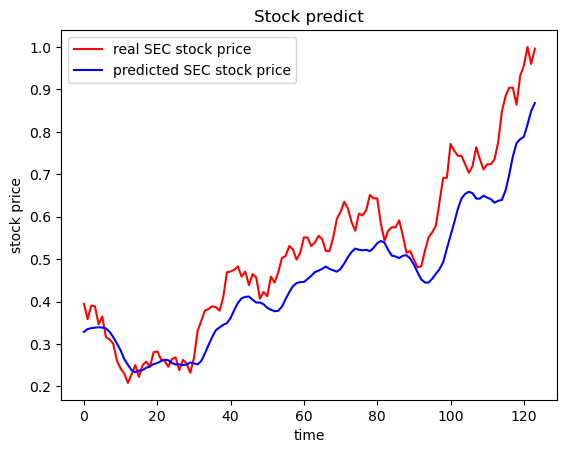

In [69]:
plt.figure()
plt.plot(test_y, color='red', label='real SEC stock price')
plt.plot(pred_y, color='blue', label='predicted SEC stock price')
plt.title('Stock predict')
plt.xlabel('time')
plt.ylabel('stock price')
plt.legend()
plt.show()

In [70]:
print("내일 SEC 주가 : ", df.Close[-1] * pred_y[-1] / dfy.Close[-1], "KRW")

내일 SEC 주가 :  [54282.3] KRW


# 댓글

In [71]:
path_to_train_file = tf.keras.utils.get_file('train.txt', 'https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt')
path_to_test_file = tf.keras.utils.get_file('test.txt', 'https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt')

4893335/4893335 [==============================] - 1s 0us/step


In [72]:
path_to_train_file

'C:\\Users\\kimtp\\.keras\\datasets\\train.txt'

In [73]:
train_text = open(path_to_train_file, 'rb').read().decode(encoding='utf-8')

In [74]:
test_text = open(path_to_test_file, 'rb').read().decode(encoding='utf-8')

In [75]:
print(train_text[0:100])

id	document	label
9976970	아 더빙.. 진짜 짜증나네요 목소리	0
3819312	흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나	1
10265843


In [76]:
train_Y = np.array([[int(row.split('\t')[2])] for row in train_text.split('\n')[1:] if row.count('\t') > 0])
test_Y = np.array([[int(row.split('\t')[2])] for row in test_text.split('\n')[1:] if row.count('\t') > 0])
print(train_Y.shape, test_Y.shape)
print(train_Y[:5])

(150000, 1) (50000, 1)
[[0]
 [1]
 [0]
 [0]
 [1]]


In [77]:
import re

In [105]:
def clean_str(string):
    string = re.sub(r'[^ ㄱㅡl가-힣]+',"",string)
    string = re.sub(r"[^가-힣A-Za-z0-9(),!?\'\`]", " ", string)
    string = re.sub(r"\'s", " \'s", string)
    string = re.sub(r"\'ve", " \'ve", string)
    string = re.sub(r"n\'t", " n\'t", string)
    string = re.sub(r"\'re", " \'re", string)
    string = re.sub(r"\'d", " \'d", string)
    string = re.sub(r"\'ll", " \'ll", string)
    string = re.sub(r",", " , ", string)
    string = re.sub(r"!", " ! ", string)
    string = re.sub(r"\(", " \( ", string)
    string = re.sub(r"\)", " \) ", string)
    string = re.sub(r"\?", " \? ", string)
    string = re.sub(r"\s{2,}", " ", string)
    string = re.sub(r"\'{2,}", "\'", string)
    string = re.sub(r"\'", "", string)
  ##string = re.sub(r"[^가-힣A-Za-z0-9(),!?\'\`]", " ", string)필요없는 데이터를 빼고 지운다
  ##string = re.sub(r"[^가-힣A-Za-z0-9(),!?\'\`]", " ", string)
    return string.lower()

In [106]:
train_text_X = [row.split('\t')[1] for row in train_text.split('\n')[1:] if row.count('\t') > 0]
train_text_X = [clean_str(sentence) for sentence in train_text_X ]

In [107]:
sentences = [sentence.split(' ') for sentence in train_text_X]
for i in range(10):
  print(sentences[i])

['아', '더빙', '진짜', '짜증나네요', '목소리']
['흠포스터보고', '초딩영화줄오버연기조차', '가볍지', '않구나']
['너무재밓었다그래서보는것을추천한다']
['교도소', '이야기구먼', '솔직히', '재미는', '없다평점', '조정']
['사이몬페그의', '익살스런', '연기가', '돋보였던', '영화스파이더맨에서', '늙어보이기만', '했던', '커스틴', '던스트가', '너무나도', '이뻐보였다']
['막', '걸음마', '뗀', '세부터', '초등학교', '학년생인', '살용영화별반개도', '아까움']
['원작의', '긴장감을', '제대로', '살려내지못했다']
['별', '반개도', '아깝다', '욕나온다', '이응경', '길용우', '연기생활이몇년인지정말', '발로해도', '그것보단', '낫겟다', '납치감금만반복반복이드라마는', '가족도없다', '연기못하는사람만모엿네']
['액션이', '없는데도', '재미', '있는', '몇안되는', '영화']
['왜케', '평점이', '낮은건데', '꽤', '볼만한데', '헐리우드식', '화려함에만', '너무', '길들여져', '있나']
